last edited by Claire Valva on May 13, 2019, with update and cleanup on June 24, 2019

# Test ENSO simulations and plotting

In [1]:
# import packages
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift
import scipy.integrate as sciint
import pandas as pd
from math import pi
from sympy import solve, Poly, Eq, Function, exp, re, im
from scipy.optimize import fsolve
from decimal import Decimal
import pickle
import time
import random
import multiprocessing as mp
from joblib import Parallel, delayed

import numpy as np
from scipy.signal import get_window, csd
from scipy.signal.windows import hann, hanning, nuttall, flattop
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import scipy.integrate as sciint
import pandas as pd
import datetime
import matplotlib.cm as cm
from math import pi
import matplotlib.ticker as tck
import datetime
from sympy import solve, Poly, Eq, Function, exp, re, im
from netCDF4 import Dataset, num2date # This is to read .nc files and time array
from scipy.optimize import fsolve
from decimal import Decimal
import pickle
import multiprocessing as mp
from joblib import Parallel, delayed
import matplotlib.colors as colors
from seaborn import cubehelix_palette #for contour plot colors
import seaborn as sns
from decimal import Decimal
import numpy.ma as ma
import random

#flatten season for plotting
flatten = lambda l: [item for sublist in l for item in sublist]

In [2]:
import scipy.stats as spyst

In [14]:
from os import walk

oldf = []
for (dirpath, dirnames, filenames) in walk('/scratch/midway2/clairev/enso_spectra/'):
    oldf.extend(filenames)
    break

f = []
for named in oldf:
    if named[0:15] == "spectra_enso_02":
        f.append(named)

In [15]:
def solve_f(X, Zofkt):
    # function to solve f coeff equation for trend analysis
    x,y = X
    f = Zofkt - x*np.exp(1j*y)
    return [np.real(f), np.imag(f)] 

def real_f(X,Zofkt):
    # function to wrap solve_f so that it can be used with fsolve
    x,y = X
    z = [x+0j,y+0j]
    actual_f = solve_f(z, Zofkt)
    return(actual_f)

def fwithZ(entry):
    answers = fsolve(real_f, np.array([0,0]), args = entry)
    return answers

# get function to generate random coeffs
def entry_fft(amp, phase = random.uniform(0, 2*pi)):
    # takes amplitude and phase to give corresponding fourier coeff
    entry = amp*np.exp(1j*phase)
    return entry

# write functions to make a longer ifft
def ext_row(row, n):
    ext_f = np.zeros(((len(row) - 1) * n + 1,), dtype="complex128")
    ext_f[::n] = row * n
    
    return ext_f

def ext_ifft_new(n, input_array):
    # add the zeros onto each end
    ext_f = [ext_row(entry,n) for entry in input_array]
    
    # make up for the formulat multiplying for array length
    olddim = len(input_array[5])
    newdim = len(ext_f[0])
    mult = newdim/olddim
    
    ext_f = np.multiply(ext_f, mult)
    adjusted_tested = np.fft.ifft2(ext_f)
    
    return adjusted_tested

In [16]:
season_titles = ["Winter", "Spring", "Summer", "Fall"]
seasons = ["winter", "spring", "summer", "fall"]

# flatten season for plotting
flatten = lambda l: [item for sublist in l for item in sublist]
named = f[0]

In [17]:
#file_name = "/scratch/midway2/clairev/enso_spectra/averaged/01_enso_avg_" + str(named[16:21])
#file_pickle = open(file_name, "rb")
#d2_touse, d2_seasons, d2_averages = pickle.load(file_pickle)

In [18]:
ens = ["nino", "nina", "neutral"]
d2_names = [enso + " " + part for part in seasons for enso in ens]
d2_names

['ninowinter',
 'ninawinter',
 'neutralwinter',
 'ninospring',
 'ninaspring',
 'neutralspring',
 'ninosummer',
 'ninasummer',
 'neutralsummer',
 'ninofall',
 'ninafall',
 'neutralfall']

In [7]:
name = "01_enso_36.0N424"
name[8:13]

'36.0N'

In [19]:
file_name = "/scratch/midway2/clairev/enso_sims/01_enso_36.0N424"
file_pickle = open(file_name, "rb")
pickled = pickle.load(file_pickle)

In [20]:
flat_sims = [flatten(entry[0]) for entry in pickled]

In [1]:
#make lists of el nino/regular/la nina years
nino = [1980,1983,1987,1988,1992,
        1995,1998,2003,2007,2010]
neutral = [1979,1981,1982,1984,1985,1986,1990,
           1991,1993,1994,1996,1997,2001,2002,
           2004,2005,2006,2009,2013,2014,2015,2016]
nina = [1989,1999,2000,2008,2011,2012]

In [16]:
len_all = 38.0
nina_per = len(nina)/len_all
nino_per = len(nino)/len_all
neutral_per = len(neutral)/len_all
all_pers = [nina_per, nino_per, neutral_per]

In [18]:
all_pers

[0.15789473684210525, 0.2631578947368421, 0.5789473684210527]

<Figure size 432x288 with 0 Axes>

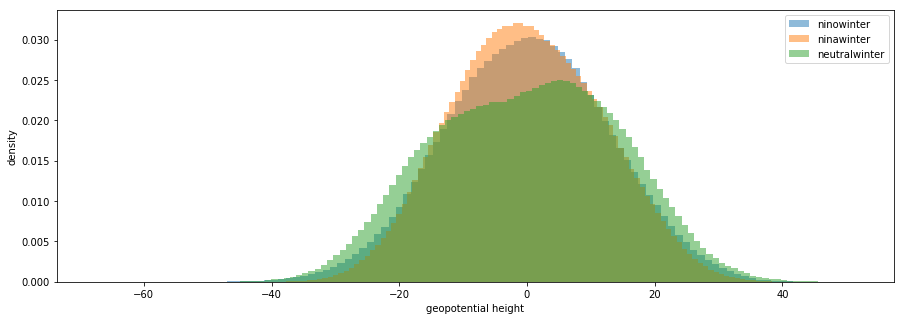

<Figure size 432x288 with 0 Axes>

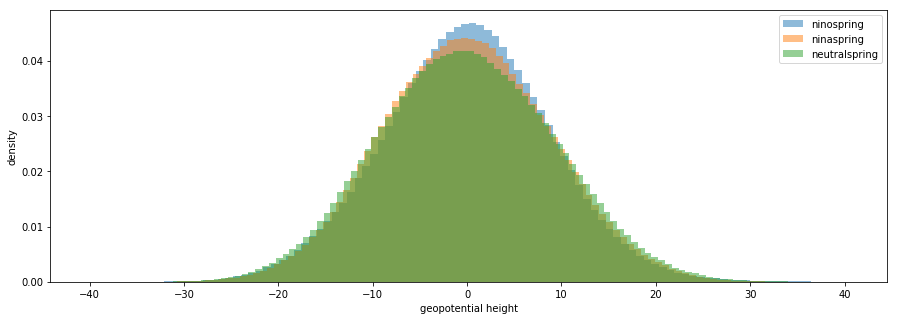

<Figure size 432x288 with 0 Axes>

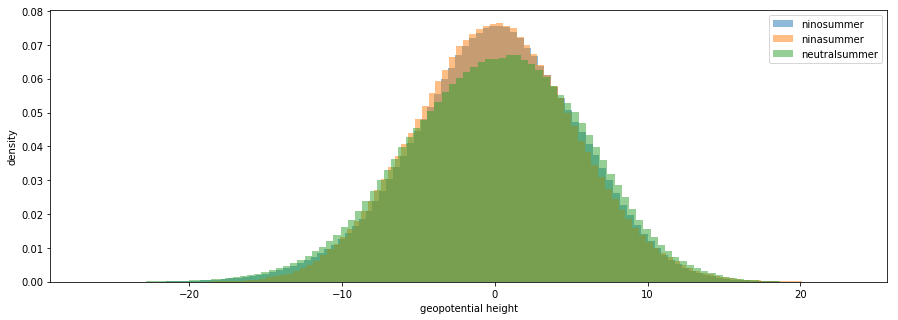

<Figure size 432x288 with 0 Axes>

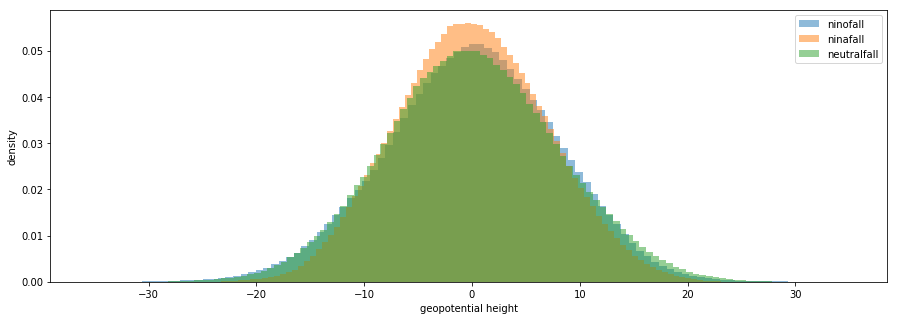

In [22]:
# now plot them
# weight them by years percentrage when plotting together
for j in range(4):
    plt.clf();
    plt.figure(figsize=(15, 5));
        
    for k in range(3):
        #print("hi")
        plt.hist(x = np.real(flat_sims[j*3 + k]), bins = 100, density = True, alpha = 0.5, label = d2_names[j*3 + k])
    plt.ylabel("density")
    plt.legend()
    plt.xlabel("geopotential height")
    
    
    plt.show()

In [ ]:
# sort them into each season
    phase_all = [[[[fwithZ(entry) for entry in sublist] 
                    for sublist in year] 
                  for year in season] 
                 for season in d2_seasons]


    # sort them into each season
    amps_all = [[[[entry[0] for entry in sublist] 
                  for sublist in year] 
                 for year in season] 
                for season in phase_all]
    
    ps_all = [[[[entry[1] % (2 * np.pi) for entry in sublist] 
                  for sublist in year] 
                 for year in season] 
                for season in phase_all]

    # adjust for winter averaging
    # TO DO: come up with better procedure rather 
    # current: chopping off edges to make the same length for averaging
    norml = 359
    longl = 364

    def padded(to_pad, index):
        length = len(to_pad)
        if index == 0:
            zeros = longl - length
            to_pad = list(to_pad)
            for i in range(zeros):
                to_pad.append(0)
            return to_pad
        else:
            return to_pad

    #pad rows with zeros to account for leap year
    season_amps_adj = [[[padded(row, 0)  
                         for row in entry] 
                        for entry in amps_all[i]] 
                       for i in range(len(amps_all))]
    
    #pad rows with zeros to account for leap year
    season_phase_adj = [[[padded(row, 0)  
                         for row in entry] 
                        for entry in ps_all[i]] 
                       for i in range(len(ps_all))]

    #get average amplitude for each season
    avg_amps = [np.average(season, axis = 0) 
                for season in season_amps_adj]

    #get std amplitude for each season
    std_amps = [np.std(season, axis = 0) 
                for season in season_amps_adj]
    
    #get average phases for each season
    avg_phase = [spyst.circmean(season, axis = 0) 
                for season in season_phase_adj]

    #get std phases for each season
    std_phase = [spyst.circstd(season, axis = 0) 
                for season in season_phase_adj]
    
    import pickle
        
    
    file_name2 = "/scratch/midway2/clairev/enso_spectra/averaged/01_enso_avg_" + str(named[16:21])
    file_pickle = open(file_name2,'wb') 
    pickle.dump([avg_amps,std_amps,avg_phase,std_phase],file_pickle)
    file_pickle.close()
    
        



    

In [ ]:
# get function to generate random coeffs
    def entry_fft(amp,std, phase, stdphase):
        # takes amplitude and phase to give corresponding fourier coeff
        amp_new = np.random.normal(loc = amp, scale = std)
        phase_new = np.random.normal(loc = phase, scale = stdphase)
        entry = amp_new*np.exp(1j*phase_new)
        return entry

    # write functions to make a longer ifft
    def ext_row(row, n):
        ext_f = np.zeros(((len(row) - 1) * n + 1,), dtype="complex128")
        ext_f[::n] = row * n
    
        return ext_f

    def ext_ifft_new(n, input_array):
    # add the zeros onto each end
        ext_f = [ext_row(entry,n) for entry in input_array]
    
        # make up for the formulat multiplying for array length
        olddim = len(input_array[5])
        newdim = len(ext_f[0])
        mult = newdim/olddim
    
        # ext_f = np.multiply(mult, ext_f)
        adjusted_tested = np.fft.ifft2(ext_f)
    
        return adjusted_tested



    def combined(amps,stds,phases,stdphases, length):
    # combines generation of random phase with inverse transform
        newarray = [[entry_fft(amp = amps[wave][timed],
                               std = stds[wave][timed], 
                               phase = phases[wave][timed], stdphase = stdphases[wave][timed]) 
                     for timed in range(len(amps[wave]))]
                    for wave in range(len(amps))]
    
        newarray = [np.array(leaf) for leaf in newarray]
        iffted = ext_ifft_new(length, newarray)
        
        return iffted

    def repeater(season, stds, phases,stdphases, length, times):
        # repeats the phase creation and inverse transform
        newarray = [combined(season, stds, phases,stdphases,length) for leaf in range(times)] 
        return(newarray)




    # set lims
    runlen = 75
    runtimes = 1
    repeattimes = 20

    listed_parts = []


    def repeater_2(amps,stds, phases,stdphases, length, times):
        #do procedure
        repeated_comp = [repeater(amps[i],stds[i], phases[i], stdphases[i], length, times)
                     for i in range(len(amps))]
    
    #output.put(repeated_comp)
    
    
    #listed_parts.append(repeated_comp)
    
        import pickle
        
    
        file_name2 = "/scratch/midway2/clairev/enso_sims/01_enso_" + str(named[16:21]) + str(random.randint(1,1000))
        file_pickle = open(file_name2,'wb') 
        pickle.dump(repeated_comp,file_pickle)
        file_pickle.close()
    
        return repeated_comp

    toplot = repeater_2(avg_amps,std_amps, runlen, runtimes)